# MFCC Extraction and Viz with Librosa

This notebook demonstrates some of the basic functionality of librosa version 0.4.

Following this walkthrough, you'll learn how to:

* Load audio input
* Compute mel spectrogram and MFCC
* Display features

Adapted from https://zenodo.org/record/58336#.V-rh7pMrKRu

In [1]:
#!pip install librosa
#!apt-get install sox libsox-fmt-mp3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

import librosa
import librosa.display
import IPython.display

In [3]:
import os
os.chdir("/home/")

!wget http://stephenmclaughlin.net/hipstas/wgbh_temp/wav/cpb-aacip-15-xg9f47h882__CBS175-522_.h264.wav

--2016-10-20 21:17:22--  http://stephenmclaughlin.net/hipstas/wgbh_temp/wav/cpb-aacip-15-xg9f47h882__CBS175-522_.h264.wav
Resolving stephenmclaughlin.net... 208.113.163.135
Connecting to stephenmclaughlin.net|208.113.163.135|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www.stephenmclaughlin.net/hipstas/wgbh_temp/wav/cpb-aacip-15-xg9f47h882__CBS175-522_.h264.wav [following]
--2016-10-20 21:17:22--  http://www.stephenmclaughlin.net/hipstas/wgbh_temp/wav/cpb-aacip-15-xg9f47h882__CBS175-522_.h264.wav
Resolving www.stephenmclaughlin.net... 208.113.163.135
Reusing existing connection to stephenmclaughlin.net:80.
HTTP request sent, awaiting response... 200 OK
Length: 17113166 (16M) [audio/x-wav]
Saving to: 'cpb-aacip-15-xg9f47h882__CBS175-522_.h264.wav.2'

cpb-aacip-15-xg9f47 100%[===================>]  16.32M  4.25MB/s    in 5.9s    

2016-10-20 21:17:29 (2.75 MB/s) - 'cpb-aacip-15-xg9f47h882__CBS175-522_.h264.wav.2' saved [17113166/1711316

In [4]:
## Load WAV with Librosa

wav_pathname = "cpb-aacip-15-xg9f47h882__CBS175-522_.h264.wav"

# or:
# wav_pathname = librosa.util.example_audio_file()

y, sr = librosa.load(wav_pathname)

By default, librosa will resample the signal to 22050Hz.

Set samplerate manually:
```
librosa.load(wav_pathname, sr=44100)
```
Or disable resampling:
```
librosa.load(wav_pathname, sr=None)
```


# Mel spectrogram
This first step will show how to compute a [Mel](http://en.wikipedia.org/wiki/Mel_scale) spectrogram from an audio waveform.

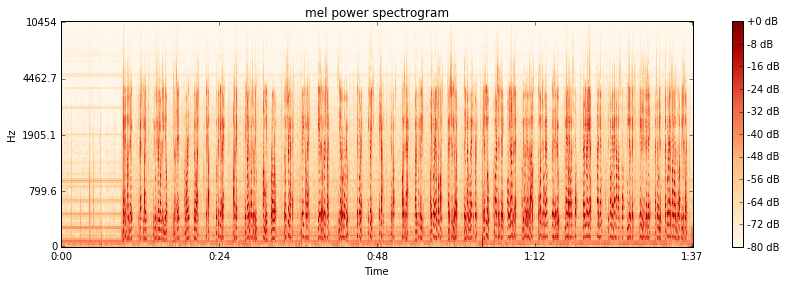

In [5]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [6]:
## Examining Mel object

print len(S)
print len(S[0])

128
4179


In [7]:
## Rotating Mel table clockwise 3 times

S_rot=np.rot90(S,3)

print len(S_rot)
print len(S_rot[0])

4179
128


# MFCC

[Mel-frequency cepstral coefficients](http://en.wikipedia.org/wiki/Mel-frequency_cepstrum) are commonly used to represent texture or timbre of sound.

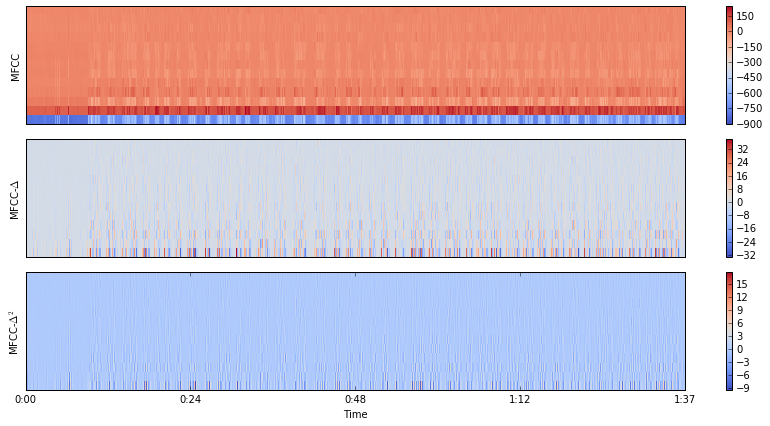

In [8]:
# Next, we'll extract the first 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Padding first and second deltas
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# Stacking these 3 tables together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

In [9]:
## Time test: Load WAV and extract 128 Mel coefficients

import time

start_time = time.time()

y, sr = librosa.load(wav_pathname)

mel_128=librosa.feature.mfcc(S=log_S, n_mfcc=128)

print("%s" % (time.time() - start_time)+" seconds")

21.5377280712 seconds


In [10]:
## Time test: Load WAV and extract 13 Mel coefficients

import time

start_time = time.time()

y, sr = librosa.load(wav_pathname)

mel_13=librosa.feature.mfcc(S=log_S, n_mfcc=13)

print("%s" % (time.time() - start_time))


14.6879861355
